In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# URL ke file CSV mentah
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv'

# Membaca CSV ke dalam DataFrame
data = pd.read_csv(url)

# Menampilkan 5 baris pertama dari DataFrame
print(data.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    34.5300     

In [3]:
# Encode categorical columns
label_encoders = {}
for col in ['Gender', 'Age', 'Ethnicity']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Fitur dan target
X = data.drop(columns=['aveOralM'])
y = data['aveOralM']

# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation using SimpleImputer # Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Model KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train) # Now, X_train should not contain any NaN values
y_pred_knn = knn.predict(X_test)

# Model Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluasi
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_knn, rmse_knn, r2_knn = evaluate(y_test, y_pred_knn)
mse_tree, rmse_tree, r2_tree = evaluate(y_test, y_pred_tree)

print("KNN:")
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R^2 :", r2_knn)

print("\nDecision Tree:")
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)
print("R^2 :", r2_tree)

KNN:
MSE: 0.09551862745098053
RMSE: 0.3090608798456714
R^2 : 0.5463852464347939

Decision Tree:
MSE: 0.12099264705882369
RMSE: 0.3478399733481241
R^2 : 0.4254099829171397


1. MSE (Mean Squared Error)

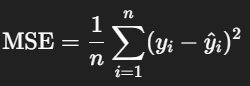

Semakin kecil nilai MSE, semakin baik model karena prediksinya mendekati nilai aktual.

2. RMSE (Root Mean Squared Error)

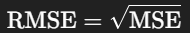

Memberikan satuan yang sama dengan target (aveOralM) — lebih mudah diinterpretasikan.

3. R² (R-Squared)

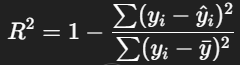

Mengukur seberapa baik variabilitas target dijelaskan oleh model. Nilai mendekati 1 lebih bagus.